In [1]:
#All required libraries import.
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#defining the number of nodes and initialize the hyperlink matrix as all zeros.
N=10
H_mat_size = (N,N)
H_mat = np.zeros(H_mat_size,dtype=int)
print(H_mat)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [3]:
#Initializing the given topology sequence as a list.
topo_seq = [13,16,17,19,23,25,27,29,31,32,37,41,43,47,49,53,59,61,64,67,71,73,79,81,83,89,97,101,103,107,109]

#In order to create the final hyperlink matrix, we use the topology sequence most and least significance digits
#to get to the appropriate connection.
for m in topo_seq:
    i=int(m/10) #most significant digit.
    j=int(m%10) #least significant digit.
    H_mat[i-1,j-1]=(1) #Link from most significant digit to least significant digit.

#Printing the hyperlink matrix.
print(H_mat)

[[0 0 1 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 1 0]
 [1 1 0 0 0 0 1 0 0 0]
 [1 0 1 0 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 1 0 0 0 1 0 1 0]]


[]

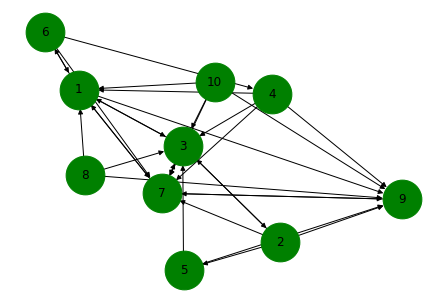

In [4]:
#Additional graph plot for visualizing the graph network.
#This code is not implemented by us, we have leveraged a code from internet and modified it as per our requirement.
#"https://medium.com/@arpanspeaks/handling-dangling-nodes-pagerank-14c31d5b6b62"
G = nx.DiGraph()
nodes = [i for i in range(0,N)]

edges=[]
for m in topo_seq:
    i=int(m/10)
    j=int(m%10)
    edges.append((i-1,j-1))

labels = {i:i+1 for i in range(0,N)}
G.add_nodes_from(nodes)
G.add_edges_from(edges)
nx.draw(G,node_size=1500,labels=labels,node_color="g",with_labels=True)
plt.plot()

In [5]:
#Part Q1(a).
# Find the row-normalized hyperlink matrix H of this graph. Are there any dangling nodes in this hyperlink graph?

#Row normalizing the hyperlink matrix we created in previous steps.
H_mat_row_sum = H_mat.sum(axis=1) #sum of all the elements of a particular row in the hyperlink matrix.

#Dividing each element of the row by its respective sum obtained in the previous step.
row_norm_H_mat = H_mat/H_mat_row_sum[:,np.newaxis]

#Printing the row normalized hyperlink matrix.
print(row_norm_H_mat)

[[0.         0.         0.25       0.         0.         0.25
  0.25       0.         0.25       0.        ]
 [0.         0.         0.25       0.         0.25       0.
  0.25       0.         0.25       0.        ]
 [0.33333333 0.33333333 0.         0.         0.         0.
  0.33333333 0.         0.         0.        ]
 [0.25       0.         0.25       0.         0.         0.
  0.25       0.         0.25       0.        ]
 [0.         0.         0.5        0.         0.         0.
  0.         0.         0.5        0.        ]
 [0.33333333 0.         0.         0.33333333 0.         0.
  0.33333333 0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.         0.         0.
  0.         0.         0.33333333 0.        ]
 [0.33333333 0.         0.33333333 0.         0.         0.
  0.         0.         0.33333333 0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]
 [0.25       0.         0.25       

In [6]:
#Initializing the equal probability matrix for finding the Google matrix.
#Since, we have 10 nodes, each value will be 1/10 i.e. 0.1
eq_prob_mat = np.full((N,N),0.1)

#Printing the equal probability matrix.
print(eq_prob_mat)

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


In [7]:
#Abstraction for creating the google matrix from row normalized hyperlink matrix, equal probability matrix,
#and the damping factor.
def get_google_mat(matx,maty,damp):
    return damp*matx + (1-damp)*maty

In [8]:
#Part Q1(b).
#Find the Google matrix G of this graph. Assume the damping factor d=0.85.

#As mentioned, damping factor = 0.85.
damp_fac = 0.85

#Getting the google matrix using the required parameters.
google_mat = get_google_mat(row_norm_H_mat,eq_prob_mat,damp_fac)

#Printing the google matrix.
print(google_mat)

[[0.015      0.015      0.2275     0.015      0.015      0.2275
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.2275     0.015      0.2275     0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.29833333 0.29833333 0.015      0.015      0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.2275     0.015      0.2275     0.015      0.015      0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.44       0.015      0.015      0.015
  0.015      0.015      0.44       0.015     ]
 [0.29833333 0.015      0.015      0.29833333 0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.865      0.015      0.015      0.015     ]
 [0.2275 

In [9]:
#Abstraction to calculate the pagerank vector v(k+1) using the pagerank vector v(k) and the google matrix.
def calc_pagerank_vector(vecV,matG):
    return (np.matmul(vecV,matG))

In [10]:
#Part Q1(d).
#Find iteratively numerical values of all elements of the PageRank row vector v=[r(P1), r(P2),…, r(P10)].
#Use your termination criterion proposed in item (c). How many iterations do you need to obtain your numerical results?
#Assume the damping factor d=0.85 and v(0)=[0.1, 0.1, 0.1,..., 0.1].

#For Part Q1(c), refer the report. We came to the conclusion in Q1(c) that as long as the difference between the elements of
#two consecutive pagerank vectors i.e. v(k+1) and v(k) is greater than 0, we have to execute the loop iteratively and stop as
#soon as this error becomes zero.

#The initial pagerank vector as given in the question.
vec0 = np.full((1,10),0.1)

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 23. Number of rows here denote the (number of iterations + 1) that will be needed
#to find the final converged pagerank vector. The +1 is displayed to show that two consecutive vectors are exactly equal.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations + 1) as 23.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat = np.full((23,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector where each row has equal probability/ranking.
vec_mat[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat[i+1,:] = calc_pagerank_vector(vec_mat[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat[i+1,:]-vec_mat[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print(i)

#Printing the pagerank vectors matrix.
print(vec_mat)

22
[[0.1        0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1       ]
 [0.17083333 0.04333333 0.19916667 0.04333333 0.03625    0.03625
  0.24166667 0.015      0.19916667 0.015     ]
 [0.16681944 0.07143056 0.16103472 0.02527083 0.02420833 0.05130208
  0.30889931 0.015      0.16103472 0.015     ]
 [0.17549112 0.0606265  0.17624569 0.02953559 0.03017899 0.05044913
  0.27122729 0.015      0.17624569 0.015     ]
 [0.16979174 0.06493628 0.16856261 0.02929392 0.02788313 0.05229186
  0.28867784 0.015      0.16856261 0.015     ]
 [0.17302995 0.06275941 0.17218455 0.02981603 0.02879896 0.05108075
  0.28014582 0.015      0.17218455 0.015     ]
 [0.17140655 0.06378562 0.17049285 0.02947288 0.02833637 0.05176886
  0.28424401 0.015      0.17049285 0.015     ]
 [0.17221044 0.06330631 0.17125759 0.02966784 0.02855444 0.05142389
  0.2823219  0.015      0.17125759 0.015     ]
 [0.17182621 0.06352298 0.17091607 0.0295701  0.02845259 0.05159472
  0.28320126 0.015 

### Since the pagerank vector we found is as follows:
#### v = [0.17194948,0.06345577,0.17102038,0.02960279,0.02848435,0.05153926,0.28292759,0.015,0.17102038,0.015]
#### On observation, it can be said that the ranking order of nodes is as follows:
#### P7, P1, P3, P9, P2, P6, P4, P5, P8, P10 as the ranking is based on the respective final converged pagerank vector values, which is
#### 0.28292759, 0.17194948, 0.17102038, 0.17102038, 0.06345577, 0.05153926, 0.02960279, 0.02848435, 0.015, 0.015

Google Matrix for damping factor=0.55
[[0.045      0.045      0.1825     0.045      0.045      0.1825
  0.1825     0.045      0.1825     0.045     ]
 [0.045      0.045      0.1825     0.045      0.1825     0.045
  0.1825     0.045      0.1825     0.045     ]
 [0.22833333 0.22833333 0.045      0.045      0.045      0.045
  0.22833333 0.045      0.045      0.045     ]
 [0.1825     0.045      0.1825     0.045      0.045      0.045
  0.1825     0.045      0.1825     0.045     ]
 [0.045      0.045      0.32       0.045      0.045      0.045
  0.045      0.045      0.32       0.045     ]
 [0.22833333 0.045      0.045      0.22833333 0.045      0.045
  0.22833333 0.045      0.045      0.045     ]
 [0.22833333 0.045      0.22833333 0.045      0.045      0.045
  0.045      0.045      0.22833333 0.045     ]
 [0.22833333 0.045      0.22833333 0.045      0.045      0.045
  0.045      0.045      0.22833333 0.045     ]
 [0.045      0.045      0.045      0.045      0.045      0.045
  0.595      0.045

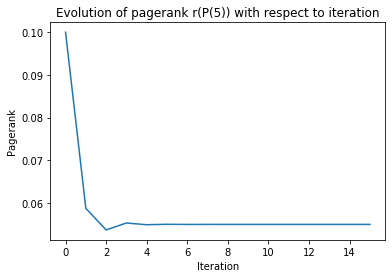

[0.1        0.19166667 0.21981597 0.2096101  0.21266913 0.21170137
 0.21200215 0.21191087 0.21193789 0.21193003 0.21193228 0.21193165
 0.21193182 0.21193177 0.21193179 0.21193178]


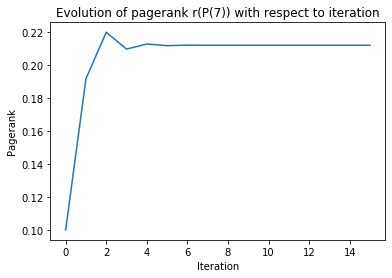

In [60]:
#Part Q1(e).
#Plot the evolution of numerical values of r(P5) and r(P7) for subsequent iteration steps of the algorithm for: 
#Part Q1(e.1).
#d=0.55 and v(0)=[0.1, 0.1, 0.1,..., 0.1]

#Given damping factor value as 0.55, v(0) as [0.1, 0.1, 0.1,...,0.1]
damp_fac = 0.55
vec0 = np.full((1,10),0.1)

#Calculating the google matrix with this new damping factor value.
google_mat = get_google_mat(row_norm_H_mat,eq_prob_mat,damp_fac)

#Printing the google matrix.
print("Google Matrix for damping factor=0.55")
print(google_mat)

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 16. Number of rows here denote the (number of iterations + 1) that will be needed
#to find the final converged pagerank vector. The +1 is displayed to show that two consecutive vectors are exactly equal.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations + 1) as 16.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat = np.full((16,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector where each row has equal probability/ranking.
vec_mat[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat[i+1,:] = calc_pagerank_vector(vec_mat[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat[i+1,:]-vec_mat[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print("\nNo. of iterations to reach the converged pagerank vector")
print(i)

#Printing the pagerank vectors matrix.
print("\nPagerank vectors")
print(vec_mat)

#We want to plot r(P(5)) and r(P(7)).
#since indexing start with 0, we will use index 4 and index 6.
r_P_5 = vec_mat[:,4]
r_P_7 = vec_mat[:,6]

#Printing and plotting the r(P(5))
print(r_P_5)
plt.plot(r_P_5)
plt.xlabel('Iteration')
plt.ylabel('Pagerank')
plt.title('Evolution of pagerank r(P(5)) with respect to iteration')
plt.show()


#Printing and plotting the r(P(7))
print(r_P_7)
plt.plot(r_P_7)
plt.xlabel('Iteration')
plt.ylabel('Pagerank')
plt.title('Evolution of pagerank r(P(7)) with respect to iteration')
plt.show()

Google Matrix for damping factor=0.85
[[0.015      0.015      0.2275     0.015      0.015      0.2275
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.2275     0.015      0.2275     0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.29833333 0.29833333 0.015      0.015      0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.2275     0.015      0.2275     0.015      0.015      0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.44       0.015      0.015      0.015
  0.015      0.015      0.44       0.015     ]
 [0.29833333 0.015      0.015      0.29833333 0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.865      0.015

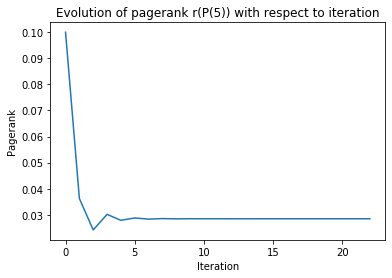

[0.1        0.24166667 0.30889931 0.27122729 0.28867784 0.28014582
 0.28424401 0.2823219  0.28320126 0.28280623 0.28298049 0.28290494
 0.28293711 0.28292367 0.28292917 0.28292697 0.28292783 0.28292751
 0.28292762 0.28292758 0.28292759 0.28292759 0.28292759]


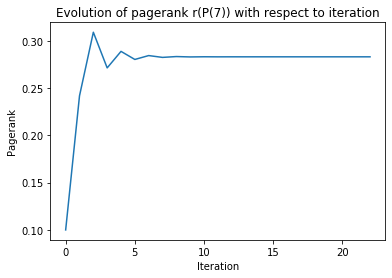

In [61]:
#Part Q1(e).
#Plot the evolution of numerical values of r(P5) and r(P7) for subsequent iteration steps of the algorithm for: 
#Part Q1(e.2).
#d=0.85 and v(0)=[0.1, 0.1, 0.1,..., 0.1]

#Given damping factor value as 0.85, v(0) as [0.1, 0.1, 0.1,...,0.1]
damp_fac = 0.85
vec0 = np.full((1,10),0.1)

#Calculating the google matrix with this new damping factor value.
google_mat = get_google_mat(row_norm_H_mat,eq_prob_mat,damp_fac)

#Printing the google matrix.
print("Google Matrix for damping factor=0.85")
print(google_mat)

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 23. Number of rows here denote the number of iterations that will be needed
#to find the final converged pagerank vector.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations) as 23.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat = np.full((23,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector where each row has equal probability/ranking.
vec_mat[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat[i+1,:] = calc_pagerank_vector(vec_mat[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat[i+1,:]-vec_mat[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print("\nNo. of iterations to reach the converged pagerank vector")
print(i)

#Printing the pagerank vectors matrix.
print("\nPagerank vectors")
print(vec_mat)

#We want to plot r(P(5)) and r(P(7)).
#since indexing start with 0, we will use index 4 and index 6.
r_P_5 = vec_mat[:,4]
r_P_7 = vec_mat[:,6]

#Printing and plotting the r(P(5))
print(r_P_5)
plt.plot(r_P_5)
plt.xlabel('Iteration')
plt.ylabel('Pagerank')
plt.title('Evolution of pagerank r(P(5)) with respect to iteration')
plt.show()


#Printing and plotting the r(P(7))
print(r_P_7)
plt.plot(r_P_7)
plt.xlabel('Iteration')
plt.ylabel('Pagerank')
plt.title('Evolution of pagerank r(P(7)) with respect to iteration')
plt.show()

In [54]:
#Part Q1(f).
#Assume d=0.85 and run your algorithm for three different initial PageRank row vectors v1(0), v2(0) and v3(0).
#What are the final numerical values of v1, v2 and v3 ? Are they identical or different?

#Let's consider v1(0) to have equiprobable values i.e. all 0.1
#Given damping factor value as 0.85
damp_fac = 0.85
vec0 = np.full((1,10),0.1)

#Calculating the google matrix with this new damping factor value.
google_mat = get_google_mat(row_norm_H_mat,eq_prob_mat,damp_fac)

#Printing the google matrix.
print("Google Matrix for damping factor=0.85")
print(google_mat)

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 23. Number of rows here denote the number of iterations that will be needed
#to find the final converged pagerank vector.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations) as 23.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat1 = np.full((23,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector where each row has equal probability/ranking.
vec_mat1[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat1[i+1,:] = calc_pagerank_vector(vec_mat1[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat1[i+1,:]-vec_mat1[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print("\nNo. of iterations to reach the converged pagerank vector")
print(i)

#Printing the pagerank vectors matrix.
print("\nPagerank vectors")
print(vec_mat1)

#Let's v2(0) have values [0.2 0 0.2 0 0.2 0 0.2 0 0.2 0]
#Given damping factor value as 0.85
damp_fac = 0.85
vec0 = np.empty([1,10])
vec0[0] = [0.2,0,0.2,0,0.2,0,0.2,0,0.2,0]

#Google matrix remains the same for this v2 as well.

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 25. Number of rows here denote the number of iterations that will be needed
#to find the final converged pagerank vector.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations) as 25.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat2 = np.full((25,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector.
vec_mat2[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat2[i+1,:] = calc_pagerank_vector(vec_mat2[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat2[i+1,:]-vec_mat2[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print("\nNo. of iterations to reach the converged pagerank vector")
print(i)

#Printing the pagerank vectors matrix.
print("\nPagerank vectors")
print(vec_mat2)

#Let's v3(0) have values [0.5 0 0 0 0 0 0 0 0 0.5]
#Given damping factor value as 0.85
damp_fac = 0.85
vec0 = np.empty([1,10])
vec0[0] = [0.5,0,0,0,0,0,0,0,0,0.5]

#Google matrix remains the same for this v3 as well.

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 25. Number of rows here denote the number of iterations that will be needed
#to find the final converged pagerank vector.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations) as 25.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat3 = np.full((25,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector.
vec_mat3[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat3[i+1,:] = calc_pagerank_vector(vec_mat3[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat3[i+1,:]-vec_mat3[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print("\nNo. of iterations to reach the converged pagerank vector")
print(i)

#Printing the pagerank vectors matrix.
print("\nPagerank vectors")
print(vec_mat3)

Google Matrix for damping factor=0.85
[[0.015      0.015      0.2275     0.015      0.015      0.2275
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.2275     0.015      0.2275     0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.29833333 0.29833333 0.015      0.015      0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.2275     0.015      0.2275     0.015      0.015      0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.44       0.015      0.015      0.015
  0.015      0.015      0.44       0.015     ]
 [0.29833333 0.015      0.015      0.29833333 0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.865      0.015

In [57]:
#Part Q1(g).
#Compare the numerical values of the PageRank row vector v for two different values of the damping factor d=0.85 and d=1. 
#What is the basic difference between them? Explain it. 

#Given damping factor value as 0.85, v(0) as [0.1, 0.1, 0.1,...,0.1]
damp_fac = 0.85
vec0 = np.full((1,10),0.1)

#Calculating the google matrix with this new damping factor value.
google_mat = get_google_mat(row_norm_H_mat,eq_prob_mat,damp_fac)

#Printing the google matrix.
print("Google Matrix for damping factor=0.85")
print(google_mat)

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 23. Number of rows here denote the number of iterations that will be needed
#to find the final converged pagerank vector.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations) as 23.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat = np.full((23,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector where each row has equal probability/ranking.
vec_mat[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat[i+1,:] = calc_pagerank_vector(vec_mat[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat[i+1,:]-vec_mat[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print("\nNo. of iterations to reach the converged pagerank vector")
print(i)

#Printing the pagerank vectors matrix.
print("\nPagerank vectors")
print(vec_mat)

#Given damping factor value as 1.00, v(0) as [0.1, 0.1, 0.1,...,0.1]
damp_fac = 1.00
vec0 = np.full((1,10),0.1)

#Calculating the google matrix with this new damping factor value.
google_mat = get_google_mat(row_norm_H_mat,eq_prob_mat,damp_fac)

#Printing the google matrix.
print("\nGoogle Matrix for damping factor=1.00")
print(google_mat)

#We create a column vector of all the pagerank vectors (i.e. storing in the form of a matrix).
#Here we define number of columns as 10 as we have 10 nodes and we will get a rank for each node/webpage.
#We define the number of rows as 30. Number of rows here denote the number of iterations that will be needed
#to find the final converged pagerank vector.
#Since, we want to have a 8 digit precision in the convergence, we have defined the number of rows(iterations) as 30.
#We found this number by implementing the termination criterion we found in Q1(c).
vec_mat = np.full((30,10),0,dtype=float)

#The first row in this pagerank vectors matrix will be the initial vector where each row has equal probability/ranking.
vec_mat[0,:]=vec0[0,:]

#Iteratively finding the converged pagerank vector and the number of iterations which are required to reach to that convergence.
i=0                 #i is working as iterator over the matrix as well as counter for counting the number of iterations.

#err is the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector.
#It is initialized as 1.0 because the difference between the elements cannot be greater than 1,
#as values of all the elements add up to 1.
err=1.0

#tolerance is the number of digits precision, in our case, we choose 8 digit precision i.e. 0.00000000
tolerance=1.0e-8

#while the sum of difference between the elements of (k+1)th pagerank vector and (k)th pagerank vector is greater than the
#number of digits precision, calculate the next pagerank vector.
while(err>tolerance):
    err = 0.0 #We assume err value is zero at the start of every iteration.
    #using the linear equation given in the reference paper, v(k+1)=v(k).G
    vec_mat[i+1,:] = calc_pagerank_vector(vec_mat[i,:],google_mat)
    #Taking the absolute difference between each elements of the (k+1)th pagerank vector and (k)th pagerank vector
    #and adding up the values to get a scalar sum.
    err = np.sum(abs(vec_mat[i+1,:]-vec_mat[i,:]))
    i = i + 1 #no. of iterations.

#Printing the number of iterations it took to reach the converged pagerank vector.
print("\nNo. of iterations to reach the converged pagerank vector")
print(i)

#Printing the pagerank vectors matrix.
print("\nPagerank vectors")
print(vec_mat)

Google Matrix for damping factor=0.85
[[0.015      0.015      0.2275     0.015      0.015      0.2275
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.2275     0.015      0.2275     0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.29833333 0.29833333 0.015      0.015      0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.2275     0.015      0.2275     0.015      0.015      0.015
  0.2275     0.015      0.2275     0.015     ]
 [0.015      0.015      0.44       0.015      0.015      0.015
  0.015      0.015      0.44       0.015     ]
 [0.29833333 0.015      0.015      0.29833333 0.015      0.015
  0.29833333 0.015      0.015      0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.29833333 0.015      0.29833333 0.015      0.015      0.015
  0.015      0.015      0.29833333 0.015     ]
 [0.015      0.015      0.015      0.015      0.015      0.015
  0.865      0.015

### The pagerank vector we found for d=0.85 is as follows:
#### v = [0.17194948,0.06345577,0.17102038,0.02960279,0.02848435,0.05153926,0.28292759,0.015,0.17102038,0.015]
#### On observation, it can be said that the ranking order of nodes is as follows:
#### P7, P1, P3, P9, P2, P6, P4, P5, P8, P10 as the ranking is based on the respective final converged pagerank vector values, which is
#### 0.28292759, 0.17194948, 0.17102038, 0.17102038, 0.06345577, 0.05153926, 0.02960279, 0.02848435, 0.015, 0.015

### The pagerank vector we found for d=1.0 is as follows:
#### v = [0.18557526,0.05972537,0.17917611,0.0154646,0.01493134,0.04639381,0.31955739,0.0,0.17917611,0.0]
#### On observation, it can be said that the ranking order of nodes is as follows:
#### P7, P1, P3, P9, P2, P6, P4, P5, P8, P10 as the ranking is based on the respective final converged pagerank vector values, which is
#### 0.31955739, 0.18557526, 0.17917611, 0.17917611, 0.05972537, 0.04639381, 0.0154646, 0.01493134, 0, 0

### We can observe that the difference is in the convergence values. But, as it is evident from the above results that the order of pagerank remains the same irrespective of damping factor value.